<a href="https://colab.research.google.com/github/bchaoss/Numerical-Optimization/blob/main/Code/04Damped_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

阻尼牛顿法

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

# Objective function
def f(x):
    return 3 * x[0]**2 +3 * x[1]**2 - (x[0]**2) * x[1]

def grad_f(x):
    return np.array([6*x[0]-2*x[0]*x[1], 6*x[1]-x[0]**2])

def Hessian(x):
    return np.array([[6-2*x[1], -2*x[0]], [-2*x[0], 6]])

In [72]:
# The Newton method
def damped_Newton_method(f, grad_f, Hessian, x0, line_conditions=None, iterMax=100):
    """
    Perform Newton's method to find the minimum of a function.

    Parameters:
        grad_f (function): The gradient of the objective function.
        Hessian (function): The Hessian matrix (second derivative matrix) of the objective function.
        x0 (array-like): The initial point for the optimization.
        iterMax (int, optional): The maximum number of iterations. Defaults to 100.

    Return:
        path (list): The sequence of iterates during the optimization process.
    """
    x = x0
    a = 1 # default step length

    path = []
    damping_factor = 1
    print("The iteration process:")
    for iter in range(iterMax):
        g = grad_f(x)
        h = Hessian(x)
        print(f"Iteration {iter}: {x}, |g|={np.linalg.norm(g, ord=np.inf)}")
        path.append(x)
        if np.linalg.norm(g, ord=np.inf) < eps:
            break

        d = -np.dot(np.linalg.inv(h + damping_factor * np.eye(2)), g)

        if line_conditions == 'Strong-Wolfe':
            if alpha := line_search(f, grad_f, x, d)[0]:
                a = alpha
            else:
                a = 1
        elif line_conditions == 'Armijo':
            a = 1
            while f(x + a * d) >= f(x) + 0.5 * a * np.dot(g, d):
                a /= 2
        else:
            a = 1
        print(a)

        x = x + a * d

    print(f"The result is ({x[0]}, {x[1]})")
    return path

eps = 1e-6

In [73]:
x0 = np.array([0, 3])
path1 = damped_Newton_method(f, grad_f, Hessian, x0=x0, line_conditions='Strong-Wolfe')

The iteration process:
Iteration 0: [0 3], |g|=18.0
1.0
Iteration 1: [0.         0.42857143], |g|=2.571428571428573
1.0
Iteration 2: [0.         0.06122449], |g|=0.3673469387755106
1.0
Iteration 3: [0.         0.00874636], |g|=0.052478134110787236
1.0
Iteration 4: [0.         0.00124948], |g|=0.007496876301541038
1.0
Iteration 5: [0.        0.0001785], |g|=0.0010709823287915767
1.0
Iteration 6: [0.00000000e+00 2.54995793e-05], |g|=0.00015299747554165384
1.0
Iteration 7: [0.00000000e+00 3.64279704e-06], |g|=2.1856782220236265e-05
1.0
Iteration 8: [0.00000000e+00 5.20399577e-07], |g|=3.122397460033752e-06
1.0
Iteration 9: [0.00000000e+00 7.43427967e-08], |g|=4.460567800048219e-07
The result is (0.0, 7.434279666747032e-08)


In [74]:
x0 = np.array([0, 3])
path2 = damped_Newton_method(f, grad_f, Hessian, x0=x0, line_conditions='Armijo')

The iteration process:
Iteration 0: [0 3], |g|=18.0
1
Iteration 1: [0.         0.42857143], |g|=2.571428571428573
1
Iteration 2: [0.         0.06122449], |g|=0.3673469387755106
1
Iteration 3: [0.         0.00874636], |g|=0.052478134110787236
1
Iteration 4: [0.         0.00124948], |g|=0.007496876301541038
1
Iteration 5: [0.        0.0001785], |g|=0.0010709823287915767
1
Iteration 6: [0.00000000e+00 2.54995793e-05], |g|=0.00015299747554165384
1
Iteration 7: [0.00000000e+00 3.64279704e-06], |g|=2.1856782220236265e-05
1
Iteration 8: [0.00000000e+00 5.20399577e-07], |g|=3.122397460033752e-06
1
Iteration 9: [0.00000000e+00 7.43427967e-08], |g|=4.460567800048219e-07
The result is (0.0, 7.434279666747032e-08)


In [ ]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)

def f(x1, x2):
    return 3 * x1**2 +3 * x2**2 - (x1**2) * x2

In [67]:
x0 = np.array([1.5, 1.5])
x = x0
path1 = []

damping_factor = 1

while iter < 100:
    g = descent(x)
    h = hessian(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(np.linalg.inv(h + damping_factor * np.eye(2)), g)
    a = 1
    #  Armijo 条件
    while f(x[0] + a*d[0], x[1] + a*d[1]) >= f(x[0], x[1]) + 0.5*a*np.dot(g, d):
        a /= 2
    x = x + a*d
    iter += 1

print(a)

TypeError: ignored

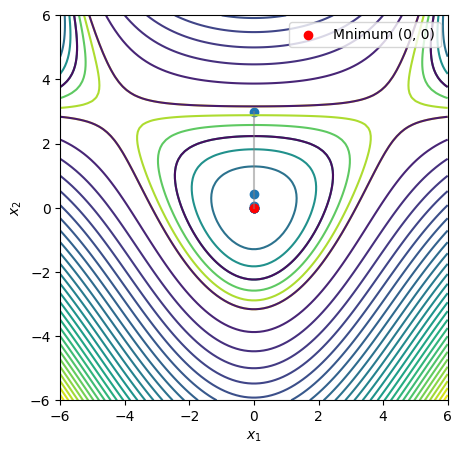

In [53]:
# show result
def f(x1, x2):
    return 3 * x1**2 + +3 * x2**2 - (x1**2) * x2

x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)

plt.figure(figsize=(5, 5))
plt.contour(X1, X2, f(X1, X2), levels=[-10, -5, 0, 5, 10, 15, 20, 25, 30])
plt.contour(X1, X2, f(X1, X2), levels=30)

plt.scatter(*zip(*path1), marker='o')
plt.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
plt.scatter(0, 0, marker='o', color='red', label='Mnimum (0, 0)')
plt.legend()

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()